In [1]:
    #-----------------------------------------------------------------------------------------------------------------------------
#------------------------------------------------[ Imports ]------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------

In [2]:
import easygui
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from adjustText import adjust_text


In [3]:
#-----------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------[ Import DataBase ]-------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------

In [4]:
pathDataTelecom=easygui.fileopenbox()
pathDataTelecom

'S:\\TunisieTelecom\\ECHANTILLON.xlsx'

In [5]:
dataTelecom=pd.read_excel(pathDataTelecom)
dataTelecom.head(1000)

,STATUT,OFFRE,ANC_M,HANDSET,revenu_voix,revenu_inter,NB_JOUR_ACTIVITE_TAXE,NB_JOUR_APPEL_TAXE,DUREE_APPEL_TOT,DUREE_APPEL_TAXEE,...,FREQ_USSD_VOIX,FREQ_USSD_SMS,VOLUME_SESSION,VOLUME_SESSION_WEEKEND,REVENU_VAS,ARPU,P_revenu_data,P_revenu_voix_c,P_revenu_vas_c,id_client
0,A,PRE - TT 1000%,143,2G,8.94,0.0,14.33,14.33,666.64,12.12,...,1.18,184.0,0.02,0.01,0.00,33.01,0.00,0.27,0.00,1.0
1,A,PRE - 900 bonus,142,2G,6.32,0.0,7.33,7.00,50.09,6.49,...,184.00,184.0,0.00,0.00,0.99,7.31,0.00,0.86,0.14,2.0
2,A,PRE - TT 1500%,142,2G,3.13,0.0,7.67,5.00,42.72,3.71,...,184.00,184.0,0.00,0.00,0.00,3.23,0.00,0.97,0.00,3.0
3,A,PRE - offre 40,140,2G,4.55,0.0,17.67,17.67,80.43,80.43,...,184.00,184.0,0.21,0.00,0.00,4.55,0.00,1.00,0.00,4.0
4,A,PRE - TT 1500%,142,2G,0.00,0.0,1.33,0.00,3.10,0.00,...,184.00,184.0,0.00,0.00,0.53,2.03,0.74,0.00,0.26,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A,PRE - Trankil TT,129,2G,1.68,0.0,10.00,10.00,27.05,27.05,...,184.00,184.0,0.01,0.00,0.00,1.68,0.00,1.00,0.00,996.0
996,A,PRE - TT 1500%,128,2G,0.13,0.0,5.00,0.67,28.54,0.27,...,184.00,184.0,0.00,0.00,0.73,1.03,0.00,0.13,0.71,997.0
997,A,PRE - Double Reinstal,120,2G,0.04,0.0,1.67,0.33,8.12,0.02,...,184.00,184.0,227.70,37.02,0.98,1.02,0.00,0.04,0.96,998.0
998,S,PRE - Double Reinstal,126,2G,0.99,0.0,2.00,2.00,7.32,4.60,...,184.00,184.0,0.00,0.00,0.00,0.99,0.00,1.00,0.00,999.0


In [6]:
# Assuming your dataframe is called 'df'
selected_variables = [
    'DUREE_APPEL_TOT',
    'nb_sms_tot' ,
    'revenu_cdr_c',
    'MNT_RECH',
    'FREQ_ACT_OUT',
    'NB_JOUR_APPEL_TAXE' ,
    'NB_SMS_TAXE' ,
    'NB_RECH_SUP5',
    'MNT_TRANSFERT_OUT' ,
    'revenu_voix' ,
    'MNT_FORFAIT_DATA',
    'NB_FORFAIT_VOIX' ,
    'OFFRE',
    'VOLUME_SESSION',
    'P_revenu_data',
    'MNT_FORFAIT',
    'FREQ_USSD',
    'P_FF_Data' ,
    'Duree_onnet_tot',
    'Duree_offnet_tot' ,
]
# Select the desired variables from the dataframe
dataTelecomSelected = dataTelecom[selected_variables].copy()
dataTelecomSelected.head(10)

,DUREE_APPEL_TOT,nb_sms_tot,revenu_cdr_c,MNT_RECH,FREQ_ACT_OUT,NB_JOUR_APPEL_TAXE,NB_SMS_TAXE,NB_RECH_SUP5,MNT_TRANSFERT_OUT,revenu_voix,MNT_FORFAIT_DATA,NB_FORFAIT_VOIX,OFFRE,VOLUME_SESSION,P_revenu_data,MNT_FORFAIT,FREQ_USSD,P_FF_Data,Duree_onnet_tot,Duree_offnet_tot
0,666.64,0.00,8.94,33.67,0.03,14.33,0.00,2.00,0.0,8.94,0.00,25.33,PRE - TT 1000%,0.02,0.00,24.07,1.18,0.0,488.44,178.19
1,50.09,1.33,7.31,7.33,0.30,7.00,0.67,0.67,0.0,6.32,0.00,0.00,PRE - 900 bonus,0.00,0.00,0.00,184.00,0.0,21.19,28.89
2,42.72,4.00,3.23,3.67,0.60,5.00,4.00,0.00,0.0,3.13,0.00,0.00,PRE - TT 1500%,0.00,0.00,0.00,184.00,0.0,29.62,13.11
3,80.43,0.00,4.55,4.33,0.60,17.67,0.00,0.33,0.0,4.55,0.00,0.00,PRE - offre 40,0.21,0.00,0.00,184.00,0.0,52.35,28.08
4,3.10,0.00,0.53,2.67,2.65,0.00,0.00,0.33,0.0,0.00,1.50,0.00,PRE - TT 1500%,0.00,0.74,1.50,17.96,1.0,2.82,0.28
5,203.96,0.00,10.59,9.33,0.27,8.67,0.00,1.67,0.0,10.59,0.00,0.00,PRE - TT 1500%,0.00,0.00,0.00,184.00,0.0,134.12,69.84
6,95.57,19.33,4.99,5.33,0.29,19.33,19.33,0.00,0.0,4.51,0.00,0.00,PRE - Trankil TT,0.00,0.00,0.00,184.00,0.0,79.68,15.87
7,36.22,2.00,5.08,6.67,0.64,10.67,0.33,1.00,0.0,5.07,0.77,0.00,PRE - Double,111.62,0.13,0.77,22.56,1.0,17.99,18.24
8,905.15,11.67,24.25,40.33,0.06,6.67,11.67,6.67,0.0,12.94,8.30,0.00,PRE - TT 1500%,1407.94,0.25,8.30,2.90,1.0,202.58,702.53
9,25.01,9.67,5.67,5.67,0.80,1.00,9.00,1.00,0.0,0.77,0.00,0.00,PRE - Double,0.00,0.00,0.00,184.00,0.0,19.27,5.74


In [7]:
dataTelecomSelectedSample=dataTelecomSelected.sample(100)
dataTelecomSelectedSample.head(150)

,DUREE_APPEL_TOT,nb_sms_tot,revenu_cdr_c,MNT_RECH,FREQ_ACT_OUT,NB_JOUR_APPEL_TAXE,NB_SMS_TAXE,NB_RECH_SUP5,MNT_TRANSFERT_OUT,revenu_voix,MNT_FORFAIT_DATA,NB_FORFAIT_VOIX,OFFRE,VOLUME_SESSION,P_revenu_data,MNT_FORFAIT,FREQ_USSD,P_FF_Data,Duree_onnet_tot,Duree_offnet_tot
32653,63.83,0.00,0.17,5.00,0.78,0.33,0.0,0.00,0.0,0.04,3.28,0.0,PRE - 1=11,0.00,0.95,3.28,5.63,1.0,12.27,51.56
39588,9.82,0.33,0.99,2.00,1.32,3.00,0.0,0.33,0.0,0.99,0.00,0.0,PRE - Double,0.00,0.00,0.00,184.00,0.0,7.04,2.78
11766,42.18,0.00,3.88,4.67,0.54,5.00,0.0,0.00,0.0,3.88,0.00,0.0,PRE - TT 1500%,0.00,0.00,0.00,184.00,0.0,18.11,24.08
13768,0.00,0.00,0.00,0.00,184.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,PRE - Trankil TT,0.08,0.00,0.00,184.00,0.0,0.00,0.00
40522,0.00,0.00,0.00,0.00,184.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,PRE - Trankil TT,0.00,0.00,0.00,184.00,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64962,0.00,0.00,0.00,0.00,184.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,PRE - Trankil TT,0.00,0.00,0.00,184.00,0.0,0.00,0.00
16757,10.81,1.33,1.57,1.67,1.30,2.00,1.0,0.00,0.0,1.26,0.00,0.0,PRE - 900 bonus,0.03,0.00,0.00,184.00,0.0,3.42,7.36
19086,10.74,0.00,0.15,1.67,0.80,0.33,0.0,0.33,0.0,0.15,1.50,0.0,PRE - 1=11,0.00,0.91,1.50,90.91,1.0,7.24,3.50
61395,45.89,0.00,2.58,4.00,0.25,17.00,0.0,0.33,0.0,2.58,0.90,0.0,PRE - Trankil TT,0.00,0.26,0.90,30.00,1.0,31.26,14.64


In [8]:
#-----------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------[ Label Encoder ]---------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------

In [9]:
label_encoder = LabelEncoder()
encoded_offre = label_encoder.fit_transform(dataTelecomSelectedSample['OFFRE'])
dataTelecomSelectedSample['OFFRE']=encoded_offre
dataTelecomSelectedSample.head(100)

,DUREE_APPEL_TOT,nb_sms_tot,revenu_cdr_c,MNT_RECH,FREQ_ACT_OUT,NB_JOUR_APPEL_TAXE,NB_SMS_TAXE,NB_RECH_SUP5,MNT_TRANSFERT_OUT,revenu_voix,MNT_FORFAIT_DATA,NB_FORFAIT_VOIX,OFFRE,VOLUME_SESSION,P_revenu_data,MNT_FORFAIT,FREQ_USSD,P_FF_Data,Duree_onnet_tot,Duree_offnet_tot
32653,63.83,0.00,0.17,5.00,0.78,0.33,0.0,0.00,0.0,0.04,3.28,0.0,1,0.00,0.95,3.28,5.63,1.0,12.27,51.56
39588,9.82,0.33,0.99,2.00,1.32,3.00,0.0,0.33,0.0,0.99,0.00,0.0,7,0.00,0.00,0.00,184.00,0.0,7.04,2.78
11766,42.18,0.00,3.88,4.67,0.54,5.00,0.0,0.00,0.0,3.88,0.00,0.0,17,0.00,0.00,0.00,184.00,0.0,18.11,24.08
13768,0.00,0.00,0.00,0.00,184.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,22,0.08,0.00,0.00,184.00,0.0,0.00,0.00
40522,0.00,0.00,0.00,0.00,184.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,22,0.00,0.00,0.00,184.00,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64962,0.00,0.00,0.00,0.00,184.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,22,0.00,0.00,0.00,184.00,0.0,0.00,0.00
16757,10.81,1.33,1.57,1.67,1.30,2.00,1.0,0.00,0.0,1.26,0.00,0.0,2,0.03,0.00,0.00,184.00,0.0,3.42,7.36
19086,10.74,0.00,0.15,1.67,0.80,0.33,0.0,0.33,0.0,0.15,1.50,0.0,1,0.00,0.91,1.50,90.91,1.0,7.24,3.50
61395,45.89,0.00,2.58,4.00,0.25,17.00,0.0,0.33,0.0,2.58,0.90,0.0,22,0.00,0.26,0.90,30.00,1.0,31.26,14.64


In [10]:
#-----------------------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------[ PCA ]-----------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------

In [11]:
iris = dataTelecomSelectedSample
X = iris.iloc[:,0:20]
X

,DUREE_APPEL_TOT,nb_sms_tot,revenu_cdr_c,MNT_RECH,FREQ_ACT_OUT,NB_JOUR_APPEL_TAXE,NB_SMS_TAXE,NB_RECH_SUP5,MNT_TRANSFERT_OUT,revenu_voix,MNT_FORFAIT_DATA,NB_FORFAIT_VOIX,OFFRE,VOLUME_SESSION,P_revenu_data,MNT_FORFAIT,FREQ_USSD,P_FF_Data,Duree_onnet_tot,Duree_offnet_tot
32653,63.83,0.00,0.17,5.00,0.78,0.33,0.0,0.00,0.0,0.04,3.28,0.0,1,0.00,0.95,3.28,5.63,1.0,12.27,51.56
39588,9.82,0.33,0.99,2.00,1.32,3.00,0.0,0.33,0.0,0.99,0.00,0.0,7,0.00,0.00,0.00,184.00,0.0,7.04,2.78
11766,42.18,0.00,3.88,4.67,0.54,5.00,0.0,0.00,0.0,3.88,0.00,0.0,17,0.00,0.00,0.00,184.00,0.0,18.11,24.08
13768,0.00,0.00,0.00,0.00,184.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,22,0.08,0.00,0.00,184.00,0.0,0.00,0.00
40522,0.00,0.00,0.00,0.00,184.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,22,0.00,0.00,0.00,184.00,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64962,0.00,0.00,0.00,0.00,184.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,22,0.00,0.00,0.00,184.00,0.0,0.00,0.00
16757,10.81,1.33,1.57,1.67,1.30,2.00,1.0,0.00,0.0,1.26,0.00,0.0,2,0.03,0.00,0.00,184.00,0.0,3.42,7.36
19086,10.74,0.00,0.15,1.67,0.80,0.33,0.0,0.33,0.0,0.15,1.50,0.0,1,0.00,0.91,1.50,90.91,1.0,7.24,3.50
61395,45.89,0.00,2.58,4.00,0.25,17.00,0.0,0.33,0.0,2.58,0.90,0.0,22,0.00,0.26,0.90,30.00,1.0,31.26,14.64


       DUREE_APPEL_TOT  nb_sms_tot  revenu_cdr_c  MNT_RECH  FREQ_ACT_OUT  \
32653            63.83        0.00          0.17      5.00          0.78   
39588             9.82        0.33          0.99      2.00          1.32   
11766            42.18        0.00          3.88      4.67          0.54   
13768             0.00        0.00          0.00      0.00        184.00   
40522             0.00        0.00          0.00      0.00        184.00   
...                ...         ...           ...       ...           ...   
64962             0.00        0.00          0.00      0.00        184.00   
16757            10.81        1.33          1.57      1.67          1.30   
19086            10.74        0.00          0.15      1.67          0.80   
61395            45.89        0.00          2.58      4.00          0.25   
64294           165.58        0.00         11.62     12.33          0.07   

       NB_JOUR_APPEL_TAXE  NB_SMS_TAXE  NB_RECH_SUP5  MNT_TRANSFERT_OUT  \
32653       

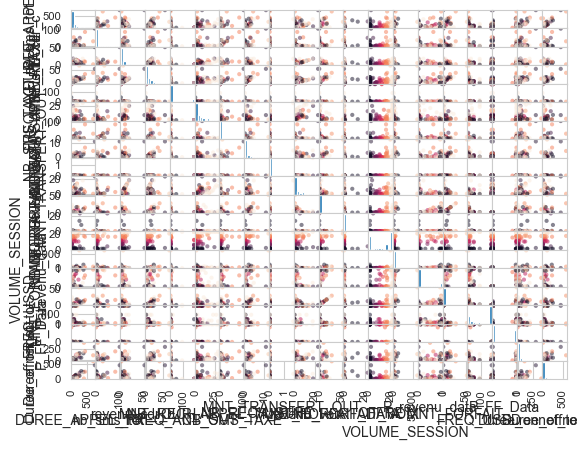

In [12]:
import seaborn as sns # nécessite le module seaborn



iris = dataTelecomSelectedSample # Charger le jeu de données iris

# Les 4 colonnes de mesures qui décrivent différents iris

X = iris.iloc[:,0:20]

colors = iris.OFFRE.astype('category')

# Les couleurs déduites de chaque espèce d'iris

y = colors.cat.codes

print(X) ; print(y)


scatter_matrix(X,c=y) ; plt.show()

In [13]:
mypca = PCA(n_components=3) # On paramètre ici pour ne garder que 3 composantes

# Modèle d'ACP

mypca.fit(X)

# Pourcentage de la variance expliquée par chacune des composantes sélectionnées.

print(mypca.singular_values_) # Valeurs de variance

print(mypca.explained_variance_ratio_) #  Pourcentages

# Axes principaux dans l'espace des caractéristiques, représentant les directions de la variance maximale dans les données. Les composantes sont triées par variance expliquée.

print(mypca.components_) #

# Résultats de l'ACP

data_sortie= mypca.fit_transform(X)

# Bruit estimé lié à la covariance

print(mypca.noise_variance_)

[63006.73632775  1648.16506578   786.65600193]
[9.99007471e-01 6.83590749e-04 1.55727205e-04]
[[ 4.53024615e-03  5.53957128e-04 -1.87279474e-05  1.11890225e-03
  -9.10215366e-04 -8.11223720e-05  1.39567141e-04  1.95777913e-04
  -1.00433158e-07 -5.74423134e-05  9.42758872e-04 -1.20198167e-05
   1.09548991e-04  9.99977080e-01  1.93383818e-05  9.35787597e-04
  -3.28628244e-03  1.82728945e-05  2.19570189e-03  2.33713528e-03]
 [ 7.85897349e-01  6.16288474e-02  2.45795989e-02  4.58578492e-02
  -1.27413312e-01  9.95940301e-03  5.98767837e-02  6.67654411e-03
   2.12835805e-04  1.27264607e-02  1.09171885e-02  4.34880920e-03
  -6.05921034e-03 -6.14646827e-03  3.18317593e-04  1.35185606e-02
  -1.70401908e-01  6.22175062e-04  2.99845501e-01  4.86204712e-01]
 [ 1.50910120e-01  3.32245463e-02  1.78843120e-02 -1.42916044e-03
   3.96808335e-01  2.03107054e-03  3.10486312e-02  2.80716579e-03
  -8.46280899e-05  1.26521753e-02 -1.75663190e-02 -4.39356640e-03
   2.27376231e-03  2.24399491e-03 -2.98103547e

In [14]:
def biplot(pca=[], x=None, y=None, components=[0, 1], score=None, coeff=None, coeff_labels=None, score_labels=None, circle='T', bigdata=1000, cat=None, cmap="viridis", density=True):
    variable_coordinates = pca.components_.T

    if isinstance(pca, PCA) == True:
        coeff = np.transpose(pca.components_[components, :])
        score = pca.fit_transform(x)[:, components]
        if isinstance(x, pd.DataFrame) == True:
            coeff_labels = list(x.columns)
    if score is not None:
        x = score
    if x.shape[1] > 1:
        xs = x[:, 0]
        ys = x[:, 1]
    else:
        xs = x
        ys = y
    if (len(xs) != len(ys)):
        print("Warning ! x et y n'ont pas la même taille !")
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    temp = (xs - xs.min())
    x_c = temp / temp.max() * 2 - 1
    temp = (ys - ys.min())
    y_c = temp / temp.max() * 2 - 1
    data = pd.DataFrame({"x_c": x_c, "y_c": y_c})
    print("Attention : pour des facilités d'affichage, les données sont centrées-réduites")
    if cat is None:
        cat = [0] * len(xs)
    elif len(pd.Series(cat)) == 1:
        cat = list(pd.Series(cat)) * len(xs)
    elif len(pd.Series(cat)) != len(xs):
        print("Warning ! Nombre anormal de catégories !")
    cat = pd.Series(cat).astype("category")
    fig = plt.figure(figsize=(12, 12), facecolor='w')
    ax = fig.add_subplot(111)
    if (len(xs) < bigdata):
        ax.scatter(x_c, y_c, c=cat.cat.codes, cmap=cmap)
        if density == True:
            print("Warning ! Le mode density actif n'apparait que si BigData est paramétré.")
    else:
        norm = mpl.colors.Normalize(vmin=0, vmax=(len(np.unique(cat.cat.codes))))
        cmap = cmap
        m = cm.ScalarMappable(norm=norm, cmap=cmap)
        if density == True:
            sns.set_style("white")
            sns.kdeplot(x="x_c", y="y_c", data=data)
            if len(np.unique(cat)) <= 1:
                sns.kdeplot(x="x_c", y="y_c", data=data, cmap="Blues", shade=True, thresh=0)
            else:
                for i in np.unique(cat):
                    color_temp = m.to_rgba(i)
                    sns.kdeplot(x="x_c", y="y_c", data=data[cat == i], color=color_temp, shade=True, thresh=0.25, alpha=0.25)
        for cat_temp in cat.cat.codes.unique():
            x_c_temp = [x_c[i] for i in range(len(x_c)) if (cat.cat.codes[i] == cat_temp)]
            y_c_temp = [y_c[i] for i in range(len(y_c)) if (cat.cat.codes[i] == cat_temp)]
            points = [[None] * len(x_c_temp)] * 2
            points = np.array(points)
            points = points.reshape(len(x_c_temp), 2)
            points[:, 0] = x_c_temp
            points[:, 1] = y_c_temp
            hull = ConvexHull(points)
            temp = 0
            for simplex in hull.simplices:
                color_temp = m.to_rgba(cat_temp)
                plt.plot(points[simplex, 0], points[simplex, 1], color=color_temp)
                if (temp == 0):
                    plt.xlim(-1, 1)
                    plt.ylim(-1, 1)
                    temp = temp + 1
    if coeff is not None:
        if (circle == 'T'):
            x_circle = np.linspace(-1, 1, 100)
            y_circle = np.linspace(-1, 1, 100)
            X, Y = np.meshgrid(x_circle, y_circle)
            F = X ** 2 + Y ** 2 - 1.0
            plt.contour(X, Y, F, [0])
        n = coeff.shape[0]
        for i in range(n):
            plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5, head_width=0.05, head_length=0.05)
            #--> pour que adjust text fonctionne il doivent etre present pour etre après modifiés => '' chaine vide pour eviter
            # que le nom soit affiché 2 fois
            if coeff_labels is None:
                plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, "" + str(i + 1), color='g', ha='center', va='center')
            else:
                plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, '', color='red', ha='center', va='center')
            # --> originale avant cette modification
            # if coeff_labels is None:
            #     plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, "var" + str(i + 1), color='g', ha='center', va='center')
            # else:
            #     plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, coeff_labels[i], color='red', ha='center', va='center')
        if score_labels is not None:
            for i in range(len(score_labels)):
                temp_x = xs[i] * scalex
                temp_y = ys[i] * scaley
                plt.text(temp_x, temp_y, list(score_labels)[i])
        texts = []
        colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'gray', 'cyan', 'magenta', 'yellow',
                  'pink', 'teal', 'maroon', 'navy', 'olive', 'lavender', 'violet', 'turquoise', 'indigo', 'gold']
        for i, variable in enumerate(dataTelecomSelectedSample.columns[:20]):
            color = colors[i % len(colors)]
            ax.arrow(0, 0, variable_coordinates[i, 0], variable_coordinates[i, 1], head_width=0.05, head_length=0.1, fc=color, ec=color)
            texts.append(plt.text(variable_coordinates[i, 0] + 0.05, variable_coordinates[i, 1] + 0.05, variable, fontsize=12, rotation=45, color=color))

        # Adjust the position of variable labels to avoid overlap
        adjust_text(texts, arrowprops=dict(arrowstyle="-", color='black'))
    plt.xlim(-1.2, 1.2)
    plt.ylim(-1.2, 1.2)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid(linestyle='--')
    plt.show()

Attention : pour des facilités d'affichage, les données sont centrées-réduites
Warning ! Le mode density actif n'apparait que si BigData est paramétré.


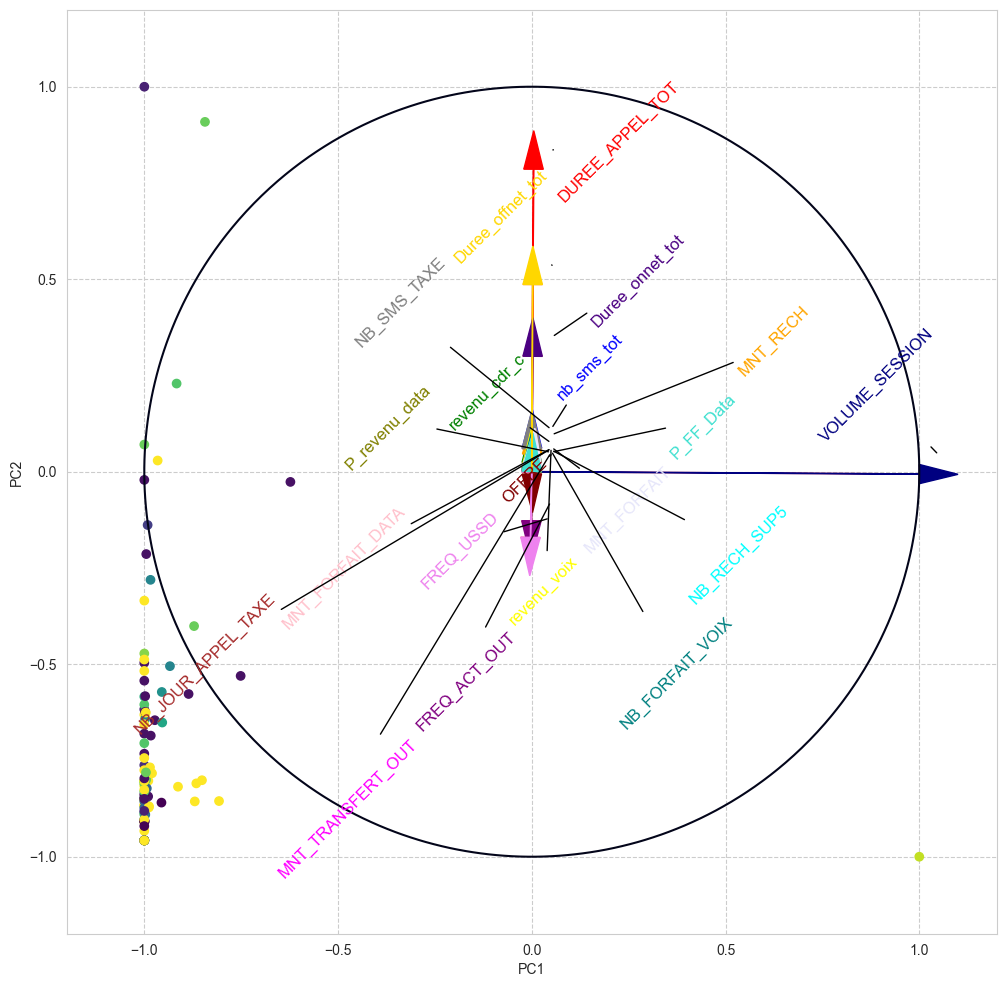

In [15]:
biplot(mypca,x=X,cat=y,components=[0,1])


plt.show()

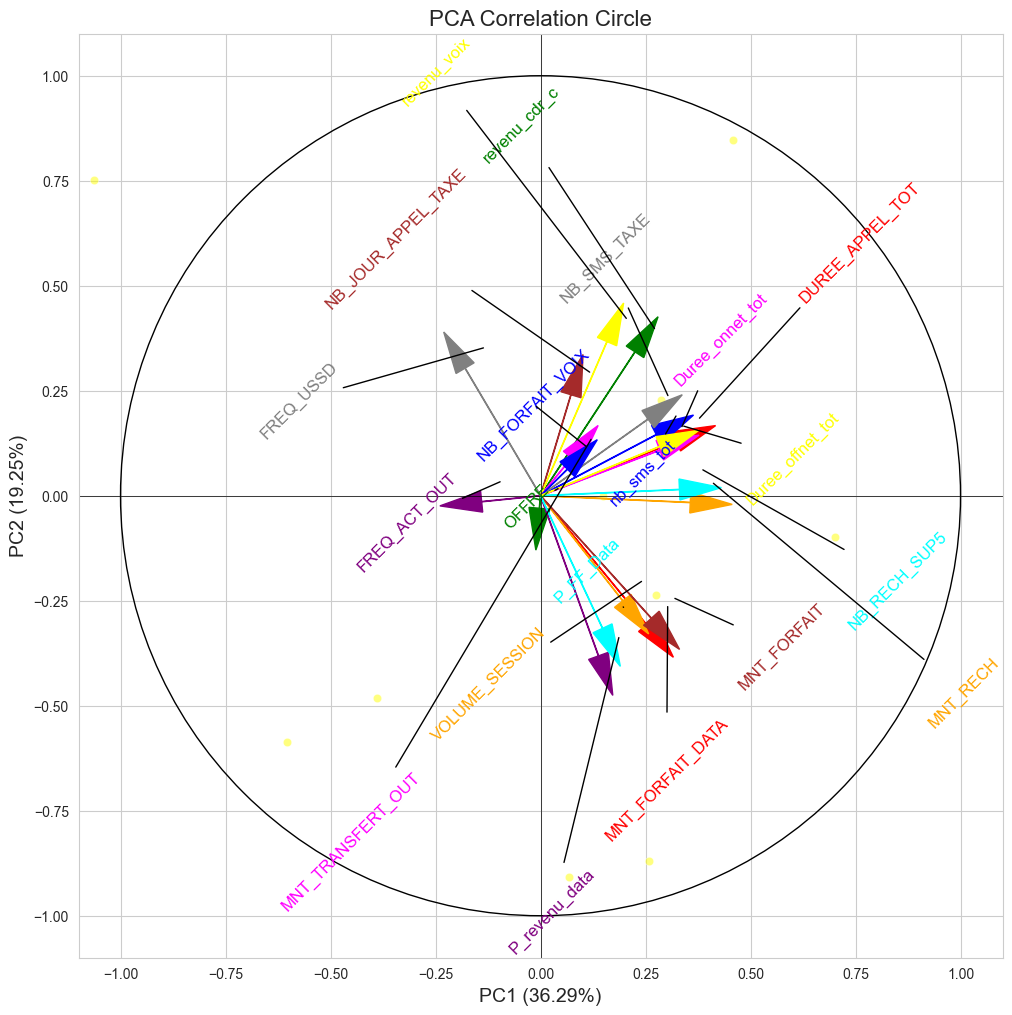

In [16]:
pca = PCA(n_components=2)
pca.fit(dataTelecomSelectedSample)

data_mean = np.mean(dataTelecomSelectedSample, axis=0)
data_std = np.std(dataTelecomSelectedSample, axis=0)
data_standardized = (dataTelecomSelectedSample - data_mean) / data_std

pca_result=pca.fit_transform(data_standardized)
# Get the coordinates of the variables on the first two principal components
variable_coordinates = pca.components_.T

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the correlation circle
circle = plt.Circle((0, 0), radius=1, edgecolor='black', facecolor='None')
ax.add_patch(circle)
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)

sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], color='yellow', alpha=0.5, legend=False)

ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)

# Add variable labels to the plot
texts = []
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'gray', 'cyan', 'magenta', 'yellow']

for i, variable in enumerate(dataTelecomSelectedSample.columns[:]):
    color=colors[i % len(colors)]
    arrow = ax.arrow(0, 0, variable_coordinates[i, 0], variable_coordinates[i, 1], head_width=0.05, head_length=0.1, fc=color, ec=color)
    texts.append(plt.text(variable_coordinates[i, 0] + 0.05, variable_coordinates[i, 1] + 0.05, variable, fontsize=12, rotation=45,color=color))

# Adjust the position of variable labels to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='black'))

# Add axis labels
ax.set_xlabel('PC1 ({}%)'.format(round(explained_variance_ratio[0] * 100, 2)), fontsize=14)
ax.set_ylabel('PC2 ({}%)'.format(round(explained_variance_ratio[1] * 100, 2)), fontsize=14)

# Set plot title
plt.title('PCA Correlation Circle', fontsize=16)

# Equal aspect ratio
ax.set_aspect('equal', adjustable='box')

# Show the plot
plt.show()
